<a href="https://colab.research.google.com/github/tuananht/boolean-search/blob/main/read_text_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install libary: pytestseract and tesseract-ocr**

In [25]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


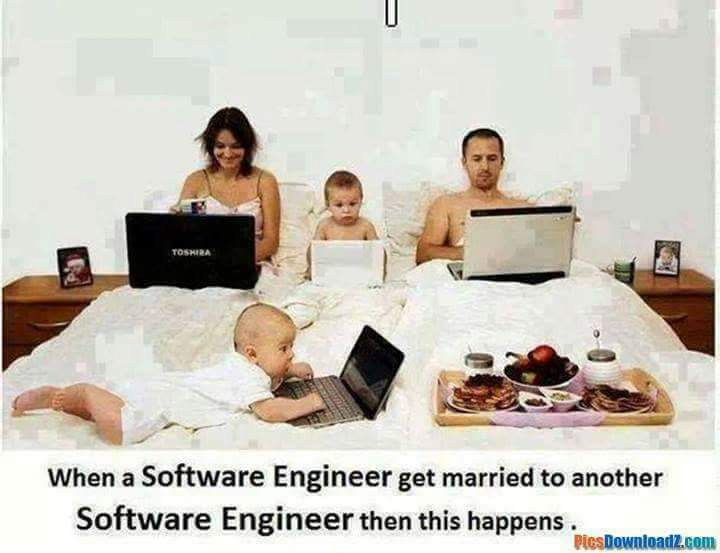

In [18]:
from google.colab.patches import cv2_imshow
import cv2
import os

file_name = "/content/drive/My Drive/UIT-GRAD/Image Sample/image2.jpg"
img = cv2.imread(file_name)
cv2_imshow(img)

## **Read text from image.**
You can use `from PIL import Image` and call `Image.open(file_name)` to read image.

In [33]:
import pytesseract

text = pytesseract.image_to_string(img)
print(text)

 

When a Software Engineer get married to another
Software Engineer then this happens =



## **Detect text from file name**


In [54]:
import cv2

def detect_text(file_name):
  img = cv2.imread(file_name)
  h, w, c = img.shape
  boxes = pytesseract.image_to_boxes(img)
  for b in boxes.splitlines():
      b = b.split(' ')
      img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

  return image

## **Capture an image from the webcam and save it to Google drive**

---




In [56]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from datetime import datetime


def take_photo(quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  filename = '/content/drive/My Drive/UIT-GRAD/Image Sample/' + datetime.now().strftime("%b-%d-%Y-%H-%M-%S") + ".jpg"
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

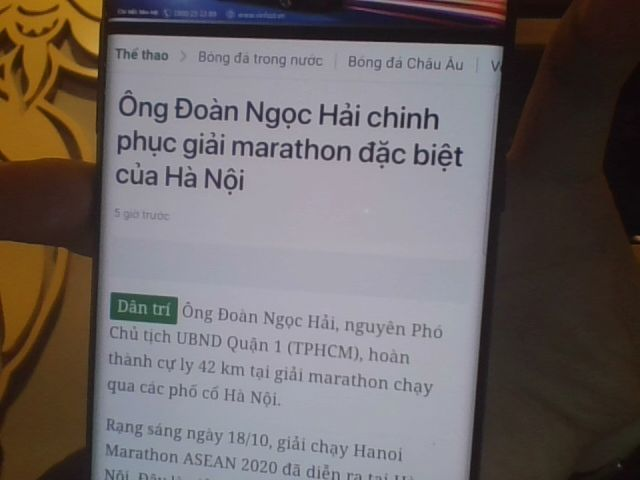

detec  
  

   

Thé thao da tr Bong da Chau Au

       
 

Ong Doan Ngoc Hai chinh
phuc giai marathon dac biét
cua Ha N6i

 
    

 

Chi tich UE

  

Doan N

 
 

  
  

thanh cy ly 42 km tai
qua cac pha ¢

 
 

 

0 Ha Noi

    

Rang sang ngay 18/10 Sidi chay Hanoj
Marathon ASEAN 295 0 ¢

a M8 ibn) ra ocr os
ae

   
   
  



In [65]:
# file_name = take_photo()
file_name = "/content/drive/My Drive/UIT-GRAD/Image Sample/Oct-18-2020-13-58-22.jpg"
# new_image = detect_text(file_name)


img = cv2.imread(file_name)
cv2_imshow(img)
text = pytesseract.image_to_string(img)
print("detec", text)